In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss

import matplotlib.pyplot as plt
import numpy as np
import os


Train on all regular seasons, test on singular regular season. Will only train on seasons before the current to prevent data leakage

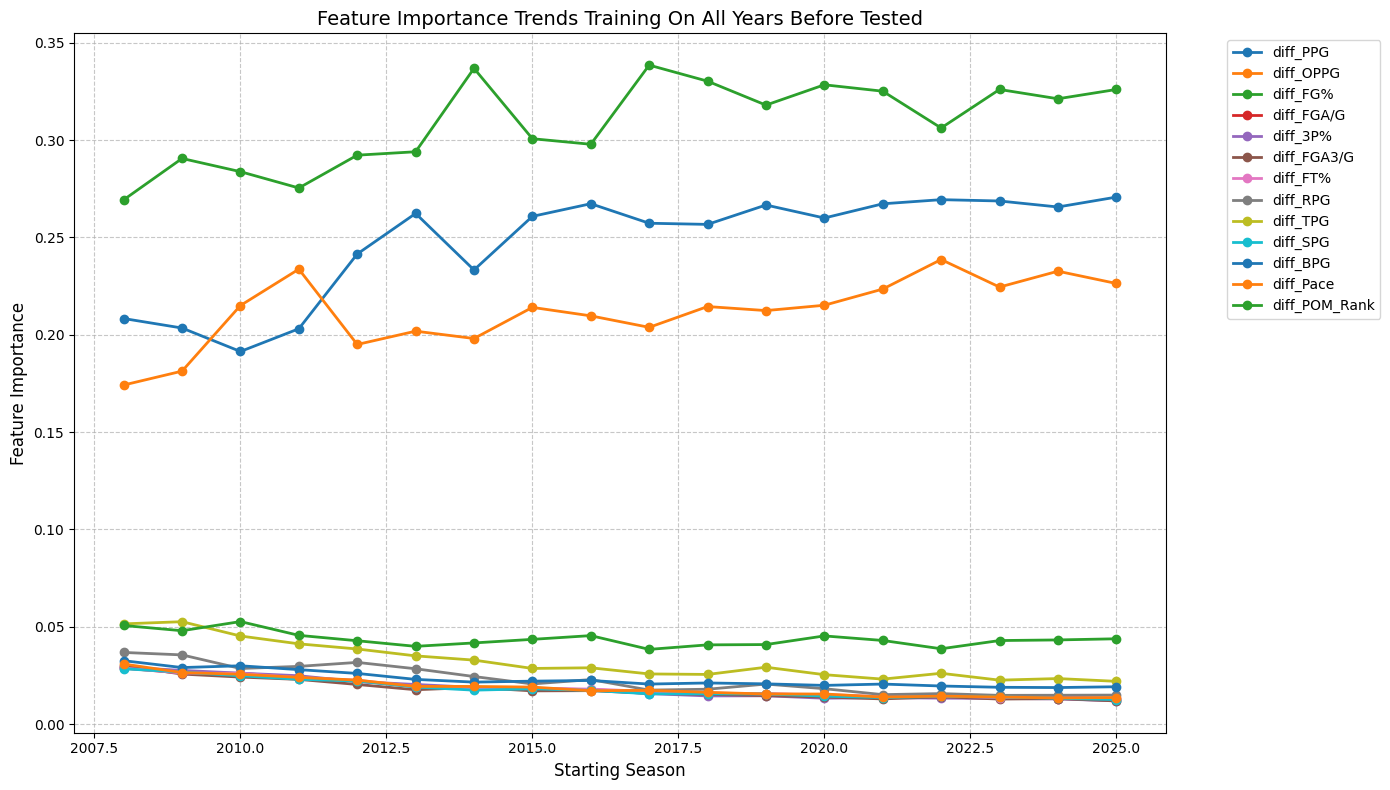

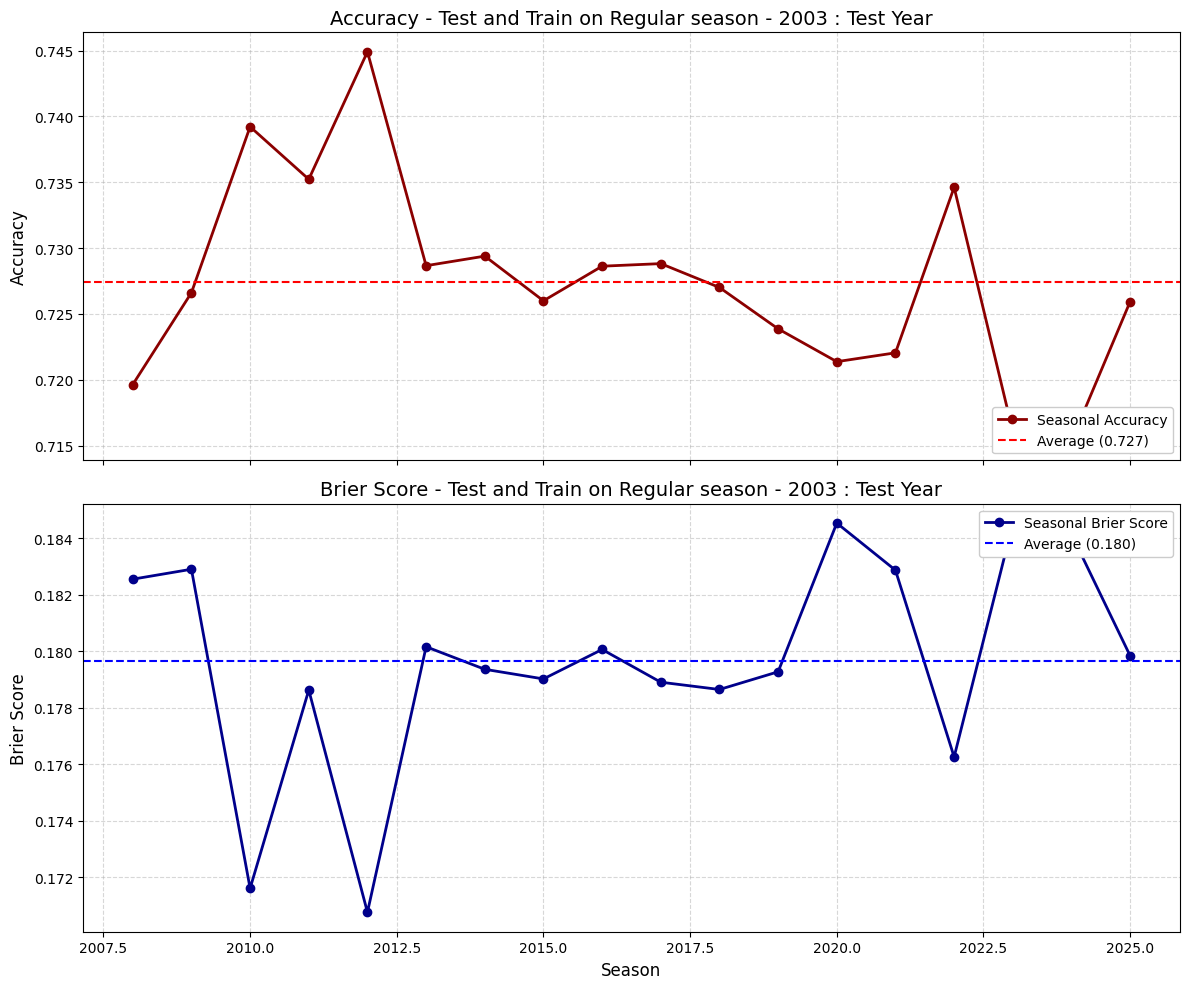


=== Final Summary ===
 Start Season  Accuracy  Brier Score
         2008  0.719640     0.182550
         2009  0.726615     0.182901
         2010  0.739217     0.171600
         2011  0.735227     0.178623
         2012  0.744908     0.170753
         2013  0.728665     0.180157
         2014  0.729392     0.179358
         2015  0.725999     0.179017
         2016  0.728627     0.180060
         2017  0.728823     0.178901
         2018  0.727012     0.178643
         2019  0.723870     0.179270
         2020  0.721378     0.184536
         2021  0.722049     0.182867
         2022  0.734612     0.176253
         2023  0.716084     0.184514
         2024  0.715356     0.184142
         2025  0.725935     0.179837

Average Accuracy: 0.7274
Average Brier Score: 0.1797
Best Brier Score: 0.1708 in 2012
Worst Brier Score: 0.1845 in 2020


In [ ]:
# Load the data
game_df = pd.read_csv('class_data/reg_season_final.csv')

# Features to use
features = ['diff_PPG', 'diff_OPPG', 'diff_FG%', 'diff_FGA/G', 'diff_3P%', 'diff_FGA3/G', 'diff_FT%',  'diff_RPG', 'diff_TPG', 'diff_SPG', 'diff_BPG', 'diff_Pace', 'diff_POM_Rank']

# Initialize dictionaries to store results
feature_importance_history = {feature: [] for feature in features}
accuracies = []
brier_scores = []
seasons = []

models = {}
for start_season in range(2008, 2026):
    train = game_df[game_df['Season'] < start_season]
    test = game_df[game_df['Season'] == start_season]

    # Skip if no test data available
    if len(test) == 0:
        print(f"Skipping {start_season} - no test data available")
        continue

    X_train = train[features]
    y_train = train['target']
    X_test = test[features]
    y_test = test['target']

    # Train model
    model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
    model.fit(X_train, y_train)
    models[start_season] = model
    
    # Evaluate with accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Evaluate with Brier score
    y_prob = model.predict_proba(X_test)[:, 1]
    brier_score = brier_score_loss(y_test, y_prob)
    brier_scores.append(brier_score)
    
    seasons.append(start_season)

    # Store feature importances
    importance = model.feature_importances_
    for feature, imp in zip(features, importance):
        feature_importance_history[feature].append(imp)

# Create a single figure for feature importance trends
plt.figure(figsize=(14, 8))
for feature in features:
    plt.plot(seasons, feature_importance_history[feature], 
             marker='o', label=feature, linewidth=2)
plt.xlabel('Starting Season', fontsize=12)
plt.ylabel('Feature Importance', fontsize=12)
plt.title('Feature Importance Trends Training On All Years Before Tested', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate averages
avg_accuracy = np.mean(accuracies)
avg_brier = np.mean(brier_scores)

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Accuracy plot
ax1.plot(seasons, accuracies, marker='o', color='darkred', linewidth=2, label='Seasonal Accuracy')
ax1.axhline(y=avg_accuracy, color='red', linestyle='--', linewidth=1.5, 
            label=f'Average ({avg_accuracy:.3f})')
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Accuracy - Test and Train on Regular season - 2003 : Test Year', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc='lower right', framealpha=1)

# Brier score plot
ax2.plot(seasons, brier_scores, marker='o', color='darkblue', linewidth=2, label='Seasonal Brier Score')
ax2.axhline(y=avg_brier, color='blue', linestyle='--', linewidth=1.5, 
            label=f'Average ({avg_brier:.3f})')
ax2.set_xlabel('Season', fontsize=12)
ax2.set_ylabel('Brier Score', fontsize=12)
ax2.set_title('Brier Score - Test and Train on Regular season - 2003 : Test Year', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend(loc='upper right', framealpha=1)

plt.tight_layout()
plt.show()


# Print final summary
print("\n=== Final Summary ===")
summary_df = pd.DataFrame({
    'Start Season': seasons,
    'Accuracy': accuracies,
    'Brier Score': brier_scores
})
print(summary_df.to_string(index=False))
print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Brier Score: {np.mean(brier_scores):.4f}")
print(f"Best Brier Score: {np.min(brier_scores):.4f} in {seasons[np.argmin(brier_scores)]}")
print(f"Worst Brier Score: {np.max(brier_scores):.4f} in {seasons[np.argmax(brier_scores)]}")

Let's see if the evolution of the game has an impacton accuracy and train on seasons more relevant than the one being tested on. Train on 5 regular seasons before current, test on current

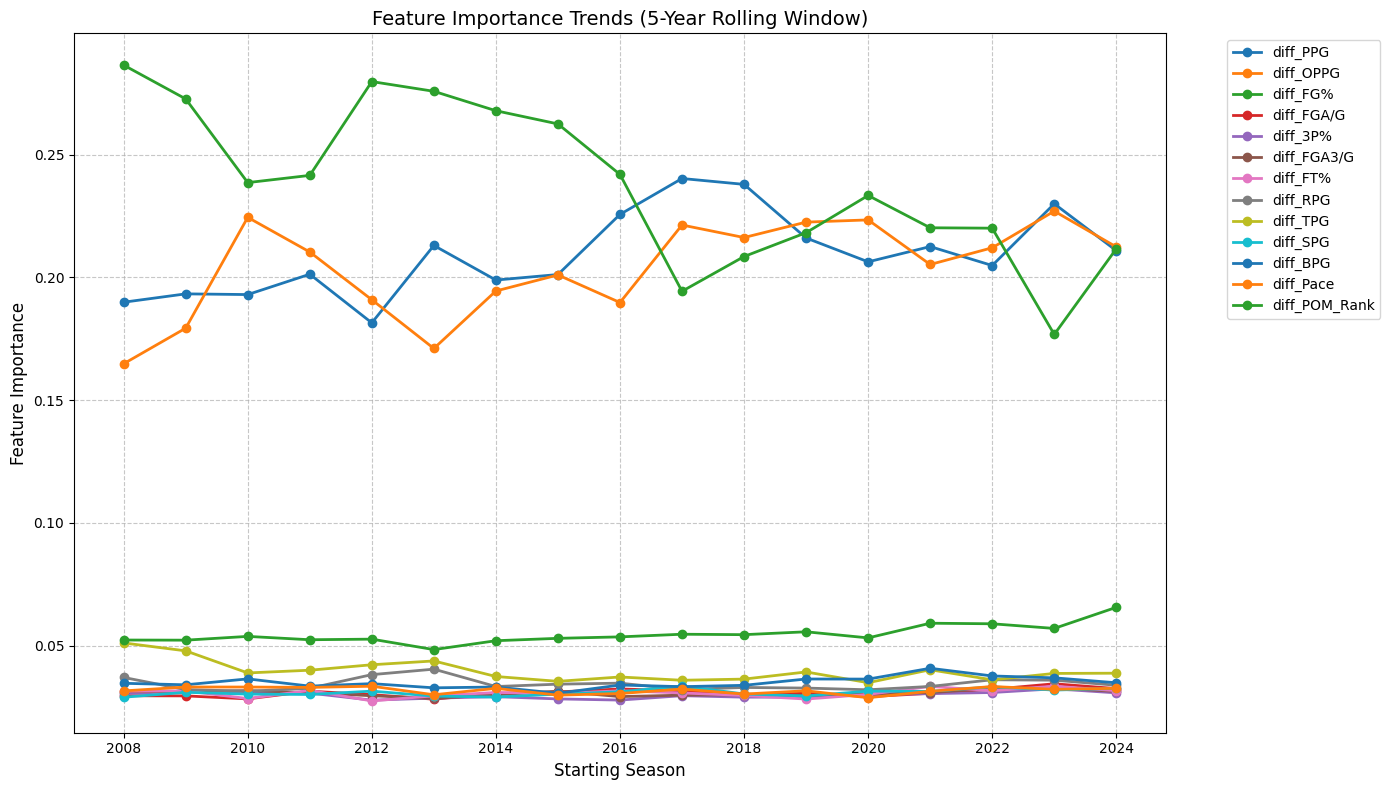

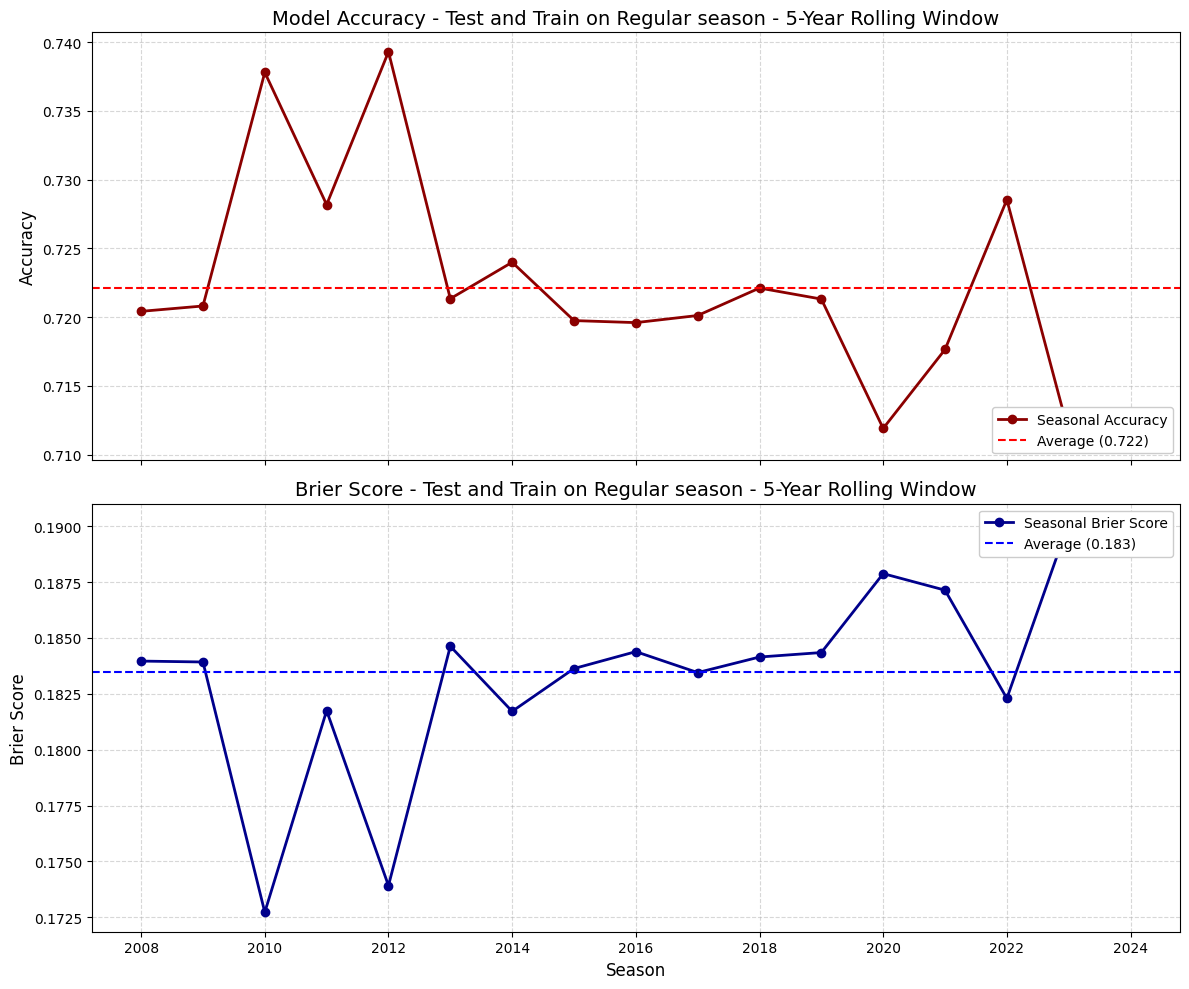


=== Final Summary ===
 Season  Accuracy  Brier Score
   2008  0.720414     0.183966
   2009  0.720804     0.183926
   2010  0.737792     0.172724
   2011  0.728174     0.181748
   2012  0.739292     0.173917
   2013  0.721335     0.184630
   2014  0.723984     0.181716
   2015  0.719742     0.183632
   2016  0.719594     0.184389
   2017  0.720111     0.183452
   2018  0.722109     0.184148
   2019  0.721307     0.184348
   2020  0.711899     0.187881
   2021  0.717639     0.187140
   2022  0.728531     0.182297
   2023  0.711621     0.190143
   2024  0.710986     0.189420

Average Accuracy: 0.7221
Average Brier Score: 0.1835
Best Brier Score: 0.1727 in 2010
Worst Brier Score: 0.1901 in 2023


In [ ]:
# Load the data
game_df = pd.read_csv('class_data/reg_season_final.csv')

# Features to use
features = ['diff_PPG', 'diff_OPPG', 'diff_FG%', 
            'diff_FGA/G', 'diff_3P%', 'diff_FGA3/G', 'diff_FT%', 
            'diff_RPG', 'diff_TPG', 'diff_SPG', 'diff_BPG', 'diff_Pace', 'diff_POM_Rank']

# Initialize dictionaries to store results
feature_importance_history = {feature: [] for feature in features}
accuracies = []
brier_scores = []
seasons = []

for start_season in range(2008, 2025):
    min_season = max(start_season - 4, game_df['Season'].min())  # Ensure we don't go before available data
    
    train = game_df[(game_df['Season'] >= min_season) & (game_df['Season'] < start_season)]
    test = game_df[game_df['Season'] == start_season]

    # Skip if no test data available
    if len(test) == 0:
        print(f"Skipping {start_season} - no test data available")
        continue

    X_train = train[features]
    y_train = train['target']
    X_test = test[features]
    y_test = test['target']

    # Train model
    model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
    model.fit(X_train, y_train)
    
    # Evaluate with accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Evaluate with Brier score
    y_prob = model.predict_proba(X_test)[:, 1]
    brier_score = brier_score_loss(y_test, y_prob)
    brier_scores.append(brier_score)
    
    seasons.append(start_season)

    # Store feature importances
    importance = model.feature_importances_
    for feature, imp in zip(features, importance):
        feature_importance_history[feature].append(imp)

# Create a single figure for feature importance trends
plt.figure(figsize=(14, 8))
for feature in features:
    plt.plot(seasons, feature_importance_history[feature], 
             marker='o', label=feature, linewidth=2)
plt.xlabel('Starting Season', fontsize=12)
plt.ylabel('Feature Importance', fontsize=12)
plt.title('Feature Importance Trends (5-Year Rolling Window)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate averages
avg_accuracy = np.mean(accuracies)
avg_brier = np.mean(brier_scores)

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Accuracy plot
ax1.plot(seasons, accuracies, marker='o', color='darkred', linewidth=2, label='Seasonal Accuracy')
ax1.axhline(y=avg_accuracy, color='red', linestyle='--', linewidth=1.5, 
            label=f'Average ({avg_accuracy:.3f})')
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Model Accuracy - Test and Train on Regular season - 5-Year Rolling Window', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc='lower right', framealpha=1)

# Brier score plot
ax2.plot(seasons, brier_scores, marker='o', color='darkblue', linewidth=2, label='Seasonal Brier Score')
ax2.axhline(y=avg_brier, color='blue', linestyle='--', linewidth=1.5, 
            label=f'Average ({avg_brier:.3f})')
ax2.set_xlabel('Season', fontsize=12)
ax2.set_ylabel('Brier Score', fontsize=12)
ax2.set_title('Brier Score - Test and Train on Regular season - 5-Year Rolling Window', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend(loc='upper right', framealpha=1)

plt.tight_layout()
plt.show()


# Print final summary
print("\n=== Final Summary ===")
summary_df = pd.DataFrame({
    'Season': seasons,
    'Accuracy': accuracies,
    'Brier Score': brier_scores,
})
print(summary_df.to_string(index=False))

print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Brier Score: {np.mean(brier_scores):.4f}")
print(f"Best Brier Score: {np.min(brier_scores):.4f} in {seasons[np.argmin(brier_scores)]}")
print(f"Worst Brier Score: {np.max(brier_scores):.4f} in {seasons[np.argmax(brier_scores)]}")

Let's repeat the previous, but test on the NCAA tournament outcomes for each season rather than regular season games. We will train on every regular season game, and then test on the 63 tournament games per year

Season 2008: Accuracy = 0.7422, Brier Score = 0.1642
Season 2009: Accuracy = 0.6953, Brier Score = 0.2011
Season 2010: Accuracy = 0.6484, Brier Score = 0.2072
Season 2011: Accuracy = 0.6269, Brier Score = 0.2338
Season 2012: Accuracy = 0.6418, Brier Score = 0.2090
Season 2013: Accuracy = 0.5970, Brier Score = 0.2254
Season 2014: Accuracy = 0.6866, Brier Score = 0.2074
Season 2015: Accuracy = 0.7239, Brier Score = 0.1792
Season 2016: Accuracy = 0.7164, Brier Score = 0.1998
Season 2017: Accuracy = 0.6567, Brier Score = 0.2161
Season 2018: Accuracy = 0.6866, Brier Score = 0.2212
Season 2019: Accuracy = 0.6866, Brier Score = 0.1886
Season 2021: Accuracy = 0.6364, Brier Score = 0.2328
Season 2022: Accuracy = 0.6194, Brier Score = 0.2578
Season 2023: Accuracy = 0.6642, Brier Score = 0.2201
Season 2024: Accuracy = 0.6418, Brier Score = 0.2146


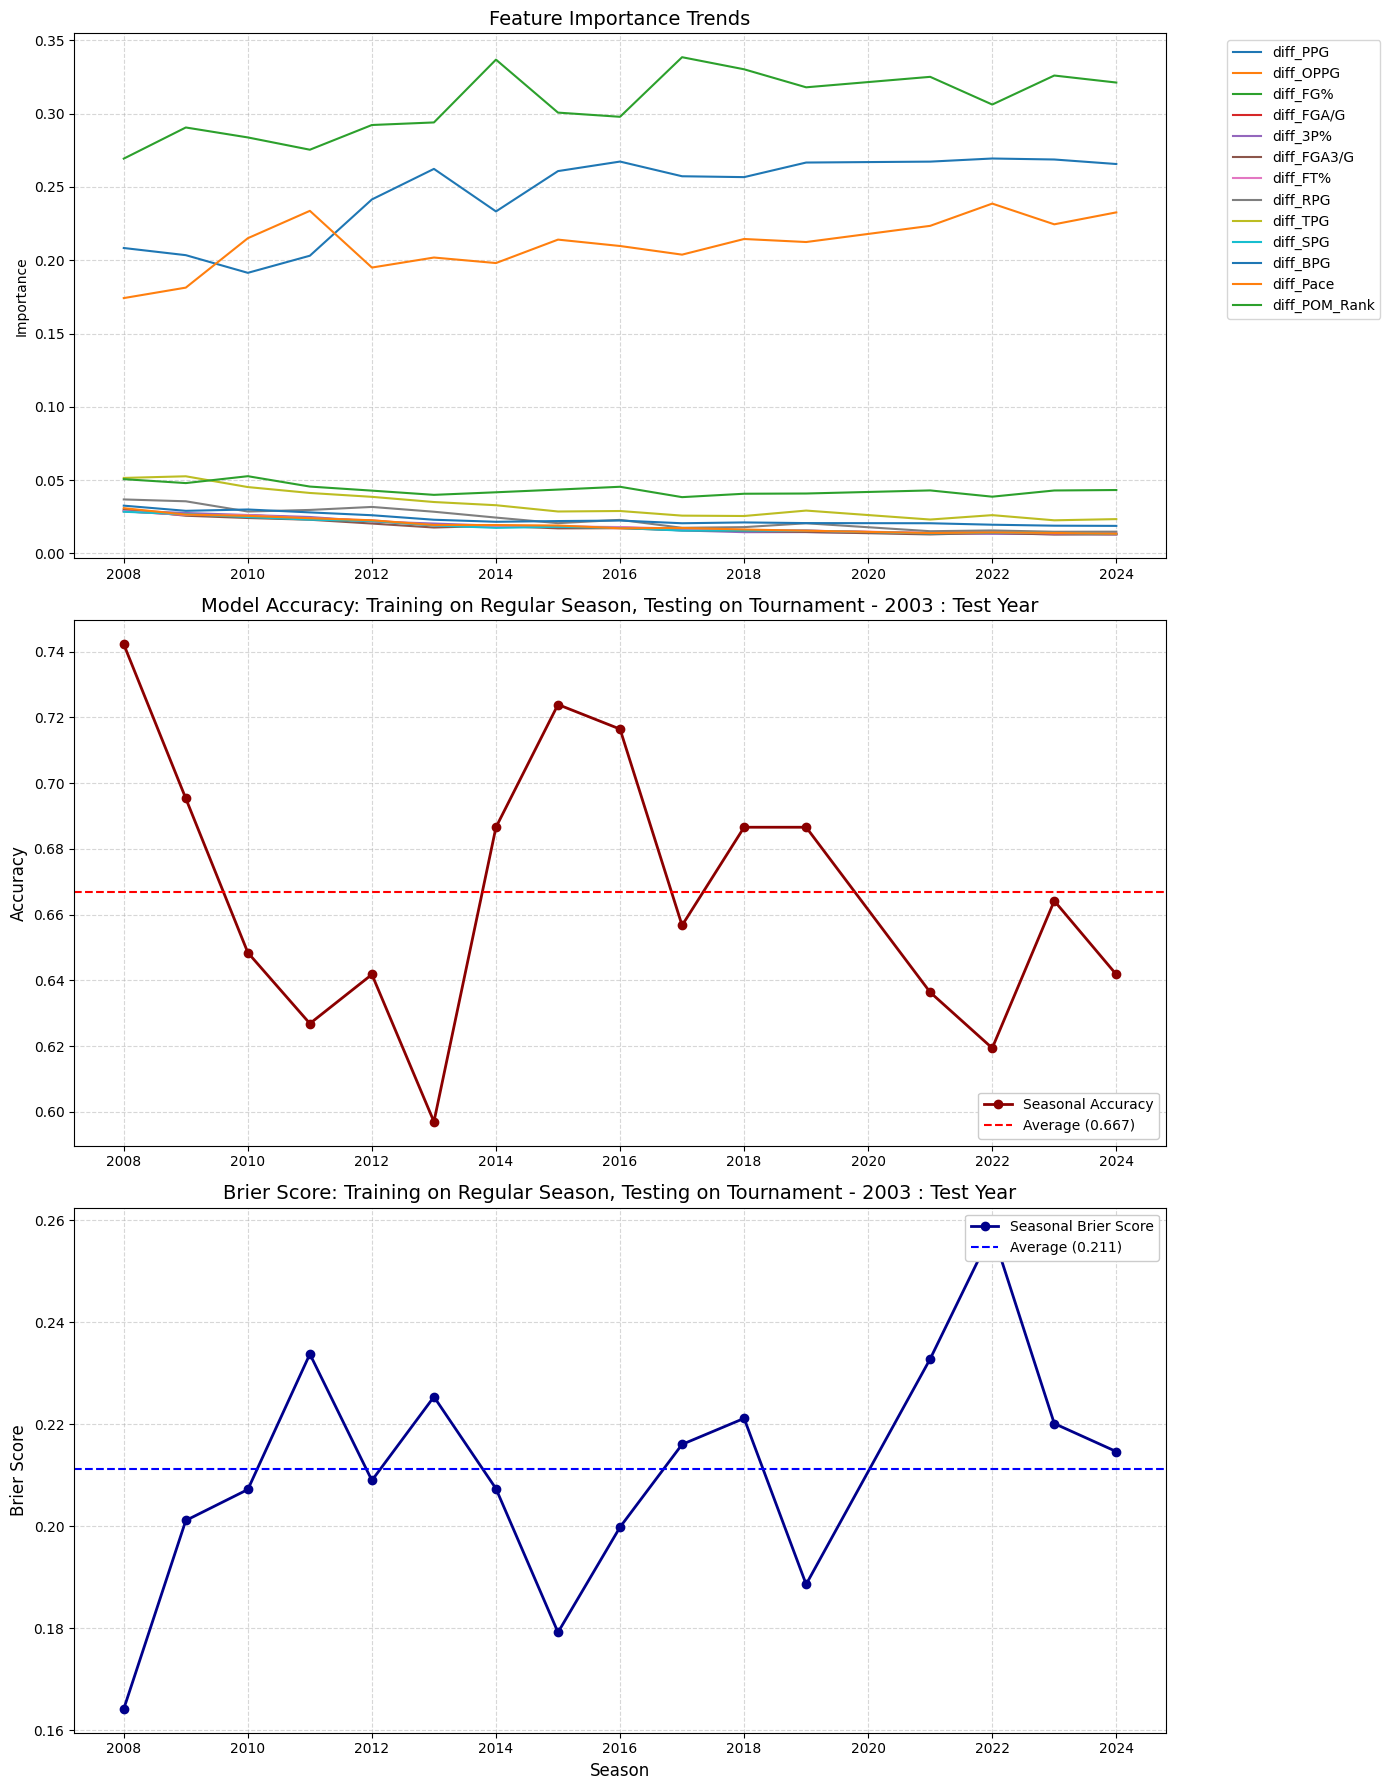


=== Validation Results ===
 Season  Accuracy  Brier Score
   2008  0.742188     0.164208
   2009  0.695312     0.201139
   2010  0.648438     0.207211
   2011  0.626866     0.233762
   2012  0.641791     0.208987
   2013  0.597015     0.225387
   2014  0.686567     0.207376
   2015  0.723881     0.179204
   2016  0.716418     0.199835
   2017  0.656716     0.216053
   2018  0.686567     0.221153
   2019  0.686567     0.188617
   2021  0.636364     0.232820
   2022  0.619403     0.257788
   2023  0.664179     0.220141
   2024  0.641791     0.214648

Average Accuracy: 0.6669
Average Brier Score: 0.2111 
Best Accuracy: 0.7422 in 2008
Best Brier Score: 0.1642 in 2008


In [3]:
# Load the data
game_df = pd.read_csv('class_data/reg_season_final.csv')
tourney_df = pd.read_csv('class_data/tourney_final.csv')

# Features to use
features = ['diff_PPG', 'diff_OPPG', 'diff_FG%', 
            'diff_FGA/G', 'diff_3P%', 'diff_FGA3/G', 'diff_FT%', 
            'diff_RPG', 'diff_TPG', 'diff_SPG', 'diff_BPG', 'diff_Pace', 
            'diff_POM_Rank']

# Initialize storage
accuracies = []
brier_scores = []
seasons = sorted([s for s in tourney_df['Season'].unique() if s >= 2008])
feature_importance_history = {feature: [] for feature in features}
baseline_brier = game_df['target'].mean() * (1 - game_df['target'].mean())  # Calculate baseline

for season in seasons:
    # Train on all regular season data BEFORE the current tournament season
    train_data = game_df[game_df['Season'] < season]
    
    # Test on current season's tournament games
    test_data = tourney_df[tourney_df['Season'] == season]
    
    # Skip if not enough training data
    if len(train_data) < 100 or len(test_data) == 0:
        print(f"Skipping {season} - insufficient data")
        continue
    
    X_train = train_data[features]
    y_train = train_data['target']
    X_test = test_data[features]
    y_test = test_data['target']
    
    # Train model
    model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  
    
    accuracy = accuracy_score(y_test, y_pred)
    brier_score = brier_score_loss(y_test, y_proba)
    
    # Store results
    accuracies.append(accuracy)
    brier_scores.append(brier_score)
    
    # Store feature importances
    for feature, imp in zip(features, model.feature_importances_):
        feature_importance_history[feature].append(imp)
    
    print(f"Season {season}: Accuracy = {accuracy:.4f}, Brier Score = {brier_score:.4f}")

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 18))

# Calculate averages
avg_accuracy = np.mean(accuracies)
avg_brier = np.mean(brier_scores)

# Feature Importance Plot
for feature in features:
    ax1.plot(seasons[-len(accuracies):], feature_importance_history[feature], label=feature)
ax1.set_title('Feature Importance Trends', fontsize=14)
ax1.set_ylabel('Importance')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.5)


# Accuracy plot
ax2.plot(seasons, accuracies, marker='o', color='darkred', linewidth=2, label='Seasonal Accuracy')
ax2.axhline(y=avg_accuracy, color='red', linestyle='--', linewidth=1.5, 
            label=f'Average ({avg_accuracy:.3f})')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Model Accuracy: Training on Regular Season, Testing on Tournament - 2003 : Test Year', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend(loc='lower right', framealpha=1)

# Brier score plot
ax3.plot(seasons, brier_scores, marker='o', color='darkblue', linewidth=2, label='Seasonal Brier Score')
ax3.axhline(y=avg_brier, color='blue', linestyle='--', linewidth=1.5, 
            label=f'Average ({avg_brier:.3f})')
ax3.set_xlabel('Season', fontsize=12)
ax3.set_ylabel('Brier Score', fontsize=12)
ax3.set_title('Brier Score: Training on Regular Season, Testing on Tournament - 2003 : Test Year', fontsize=14)
ax3.grid(True, linestyle='--', alpha=0.5)
ax3.legend(loc='upper right', framealpha=1)

plt.tight_layout()
plt.show()

# Results summary
print("\n=== Validation Results ===")
results_df = pd.DataFrame({
    'Season': seasons[-len(accuracies):],
    'Accuracy': accuracies,
    'Brier Score': brier_scores,
})
print(results_df.to_string(index=False))

print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Brier Score: {np.mean(brier_scores):.4f} ")
print(f"Best Accuracy: {max(accuracies):.4f} in {results_df.loc[np.argmax(accuracies), 'Season']}")
print(f"Best Brier Score: {min(brier_scores):.4f} in {results_df.loc[np.argmin(brier_scores), 'Season']}")

Add optimizations to the previous code

c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
4 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\sklearn.py", line 1663, in fit
    train_dmatrix, 

Season 2008: Accuracy = 0.7500, Brier Score = 0.1643
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 1.0}


c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:33:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


Season 2009: Accuracy = 0.7109, Brier Score = 0.1915
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 1.0}


c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:34:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


Season 2010: Accuracy = 0.6562, Brier Score = 0.2078
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 1.0}


c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:35:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


Season 2011: Accuracy = 0.5597, Brier Score = 0.2319
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.8}


c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:37:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


Season 2012: Accuracy = 0.6493, Brier Score = 0.2114
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}


c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:38:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


Season 2013: Accuracy = 0.6045, Brier Score = 0.2170
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}


c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:41:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


Season 2014: Accuracy = 0.6716, Brier Score = 0.2019
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'reg_alpha': 1, 'reg_lambda': 0.1, 'subsample': 0.8}


c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:43:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


Season 2015: Accuracy = 0.7015, Brier Score = 0.1780
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.8}


c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:46:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


Season 2016: Accuracy = 0.7313, Brier Score = 0.1972
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 1, 'reg_lambda': 0.1, 'subsample': 0.8}


c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:48:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


Season 2017: Accuracy = 0.6493, Brier Score = 0.2012
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}


c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [13:55:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


Season 2018: Accuracy = 0.6567, Brier Score = 0.2154
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}


c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [14:00:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


Season 2019: Accuracy = 0.6866, Brier Score = 0.1898
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.8}


c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [14:02:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


Season 2021: Accuracy = 0.6136, Brier Score = 0.2260
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 1.0}


c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [14:09:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


Season 2022: Accuracy = 0.6194, Brier Score = 0.2394
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 1.0}


c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [14:12:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


Season 2023: Accuracy = 0.6269, Brier Score = 0.2164
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.8}


c:\Users\sampa\Vscode-folders\mm25\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [14:18:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  self.starting_round = model.num_boosted_rounds()


Season 2024: Accuracy = 0.6269, Brier Score = 0.2096
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.8}


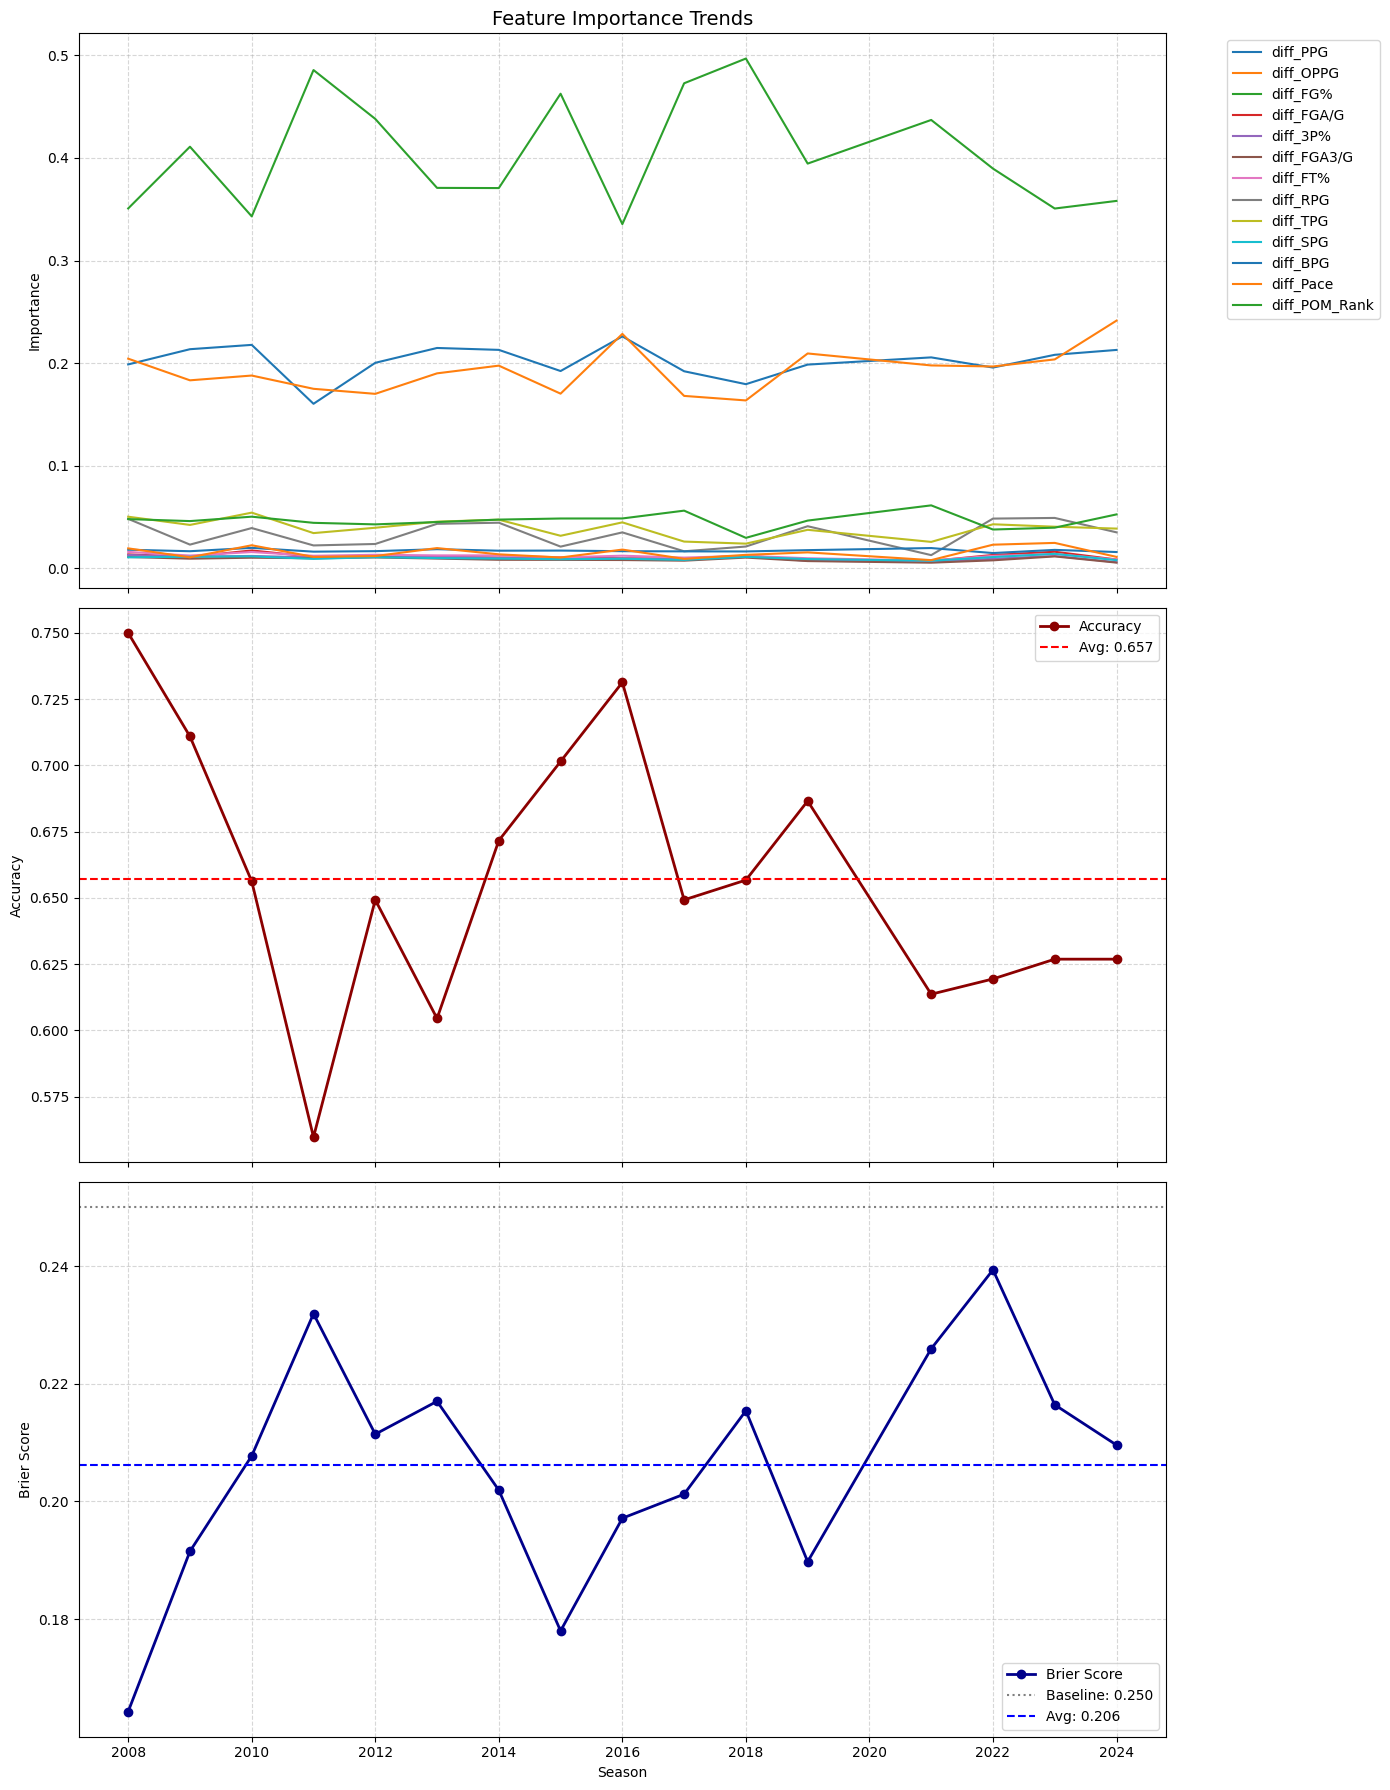


=== Final Results ===
 Season  Accuracy  Brier Score
   2008  0.750000     0.164292
   2009  0.710938     0.191525
   2010  0.656250     0.207752
   2011  0.559701     0.231917
   2012  0.649254     0.211438
   2013  0.604478     0.217031
   2014  0.671642     0.201920
   2015  0.701493     0.177999
   2016  0.731343     0.197156
   2017  0.649254     0.201246
   2018  0.656716     0.215426
   2019  0.686567     0.189767
   2021  0.613636     0.225965
   2022  0.619403     0.239382
   2023  0.626866     0.216441
   2024  0.626866     0.209595

Average Accuracy: 0.6572
Average Brier Score: 0.2062 (Baseline: 0.2500)
Best Brier Score: 0.1643 in 2008


In [ ]:

from sklearn.model_selection import GridSearchCV

# Load the data
game_df = pd.read_csv('class_data/reg_season_final.csv')
tourney_df = pd.read_csv('class_data/tourney_final.csv')

# Features to use
features = ['diff_PPG', 'diff_OPPG', 'diff_FG%', 
            'diff_FGA/G', 'diff_3P%', 'diff_FGA3/G', 'diff_FT%', 
            'diff_RPG', 'diff_TPG', 'diff_SPG', 'diff_BPG', 'diff_Pace', 
            'diff_POM_Rank']

# Initialize storage
accuracies = []
brier_scores = []
seasons = sorted([s for s in tourney_df['Season'].unique() if s >= 2008])
feature_importance_history = {feature: [] for feature in features}
baseline_brier = game_df['target'].mean() * (1 - game_df['target'].mean())

# Hyperparameter grid for Brier score optimization
param_grid = {
    'max_depth': [5, 7],               # Tree complexity
    'learning_rate': [0.1, 0.2],       # Step size shrinkage
    'subsample': [0.8, 1.0],           # Fraction of samples per tree
    'colsample_bytree': [0.8, 1.0],    # Fraction of features per tree
    'min_child_weight': [1, 3],        # Minimum sum of instance weight needed in a child
    'reg_alpha': [0.1, 1],             # L1 regularization
    'reg_lambda': [0.1, 1]             # L2 regularization
}

for season in seasons:
    # Train/test split
    train_data = game_df[game_df['Season'] < season]
    test_data = tourney_df[tourney_df['Season'] == season]
    
    if len(train_data) < 100 or len(test_data) == 0:
        print(f"Skipping {season} - insufficient data")
        continue
    
    X_train = train_data[features]
    y_train = train_data['target']
    X_test = test_data[features]
    y_test = test_data['target']
    
    # Custom scoring for Brier score minimization
    def brier_scorer(estimator, X, y):
        y_proba = estimator.predict_proba(X)[:, 1]
        return -brier_score_loss(y, y_proba)  # Negative because GridSearchCV maximizes
    
    # Optimize for Brier score
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        n_estimators=100,
        early_stopping_rounds=50,
        random_state=42,
        n_jobs=-1,
        tree_method='hist',
        predictor='cpu_predictor'
    )
    
    # Hyperparameter grid for Brier score optimization
    param_grid = {
        'max_depth': [5, 7],               # Tree complexity
        'learning_rate': [0.1, 0.2],       # Step size shrinkage
        'subsample': [0.8, 1.0],           # Fraction of samples per tree
        'colsample_bytree': [0.8, 1.0],    # Fraction of features per tree
        'min_child_weight': [1, 3],        # Minimum sum of instance weight needed in a child
        'reg_alpha': [0.1, 1],             # L1 regularization
        'reg_lambda': [0.1, 1]             # L2 regularization
    }

    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=brier_scorer,
        cv=5,
        n_jobs=-1,
        verbose=0
    )
    
    gs.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    best_model = gs.best_estimator_
    
    # Predict and evaluate
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    brier_score = brier_score_loss(y_test, y_proba)
    
    # Store results
    accuracies.append(accuracy)
    brier_scores.append(brier_score)
    
    # Store feature importances
    for feature, imp in zip(features, best_model.feature_importances_):
        feature_importance_history[feature].append(imp)
    
    print(f"Season {season}: Accuracy = {accuracy:.4f}, Brier Score = {brier_score:.4f}")
    print(f"Best params: {gs.best_params_}")

# Visualization
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Feature Importance
for feature in features:
    ax1.plot(seasons[-len(accuracies):], feature_importance_history[feature], label=feature)
ax1.set_title('Feature Importance Trends', fontsize=14)
ax1.set_ylabel('Importance')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.5)

# Accuracy
avg_accuracy = np.mean(accuracies)
ax2.plot(seasons[-len(accuracies):], accuracies, marker='o', color='darkred', 
         linewidth=2, label='Accuracy')
ax2.axhline(avg_accuracy, color='red', linestyle='--', 
            label=f'Avg: {avg_accuracy:.3f}')
ax2.set_ylabel('Accuracy')
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend()

# Brier Score
avg_brier = np.mean(brier_scores)
ax3.plot(seasons[-len(brier_scores):], brier_scores, marker='o', color='darkblue', 
         linewidth=2, label='Brier Score')
ax3.axhline(baseline_brier, color='gray', linestyle=':', 
            label=f'Baseline: {baseline_brier:.3f}')
ax3.axhline(avg_brier, color='blue', linestyle='--', 
            label=f'Avg: {avg_brier:.3f}')
ax3.set_xlabel('Season')
ax3.set_ylabel('Brier Score')
ax3.grid(True, linestyle='--', alpha=0.5)
ax3.legend()

plt.tight_layout()
plt.show()

# Results
results_df = pd.DataFrame({
    'Season': seasons[-len(accuracies):],
    'Accuracy': accuracies,
    'Brier Score': brier_scores
})
print("\n=== Final Results ===")
print(results_df.to_string(index=False))
print(f"\nAverage Accuracy: {avg_accuracy:.4f}")
print(f"Average Brier Score: {avg_brier:.4f} (Baseline: {baseline_brier:.4f})")
print(f"Best Brier Score: {min(brier_scores):.4f} in {results_df.loc[np.argmin(brier_scores), 'Season']}")

Now, we will train on tournament data, and test on tournament data

Season 2021: Accuracy = 0.6591, Brier Score = 0.2182
Season 2022: Accuracy = 0.5597, Brier Score = 0.2789
Season 2023: Accuracy = 0.6269, Brier Score = 0.2530
Season 2024: Accuracy = 0.6269, Brier Score = 0.2624


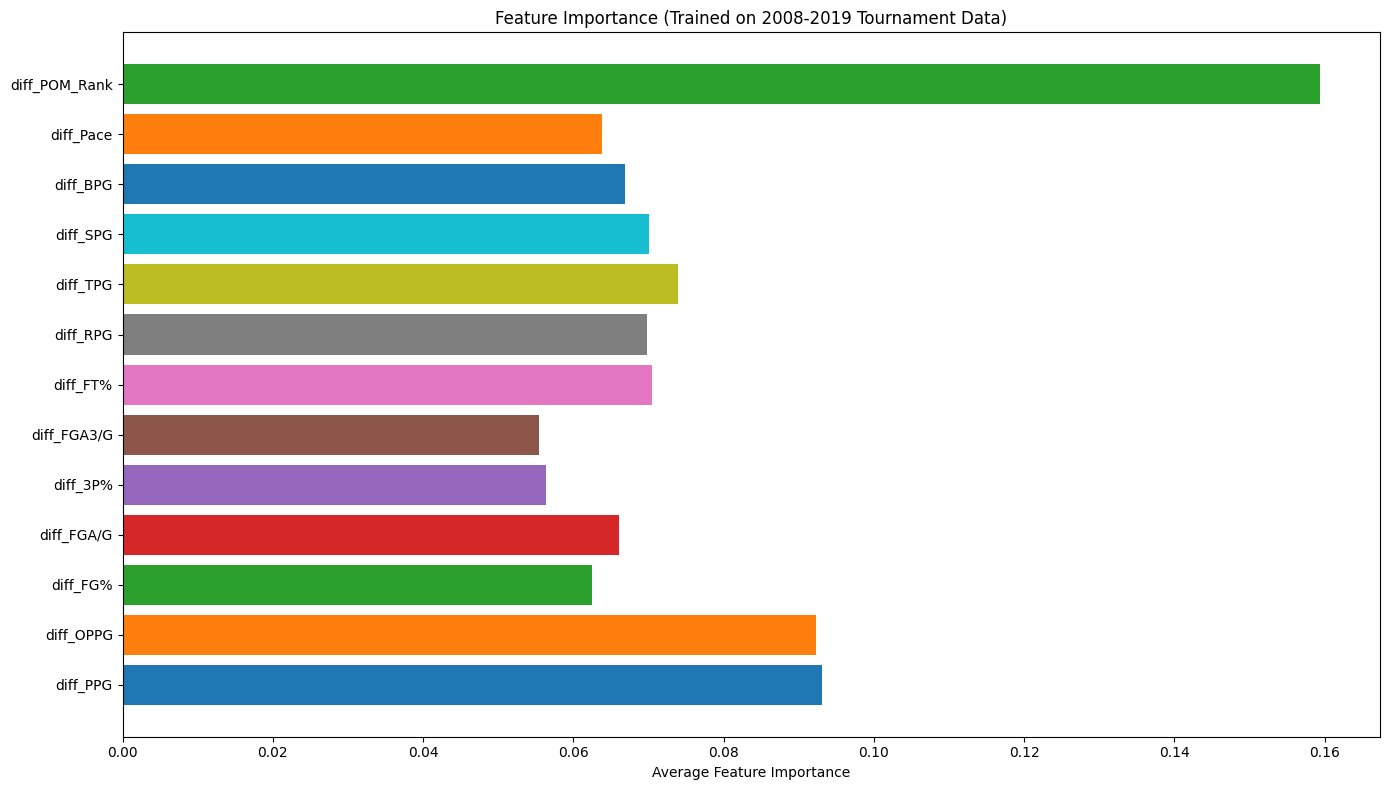

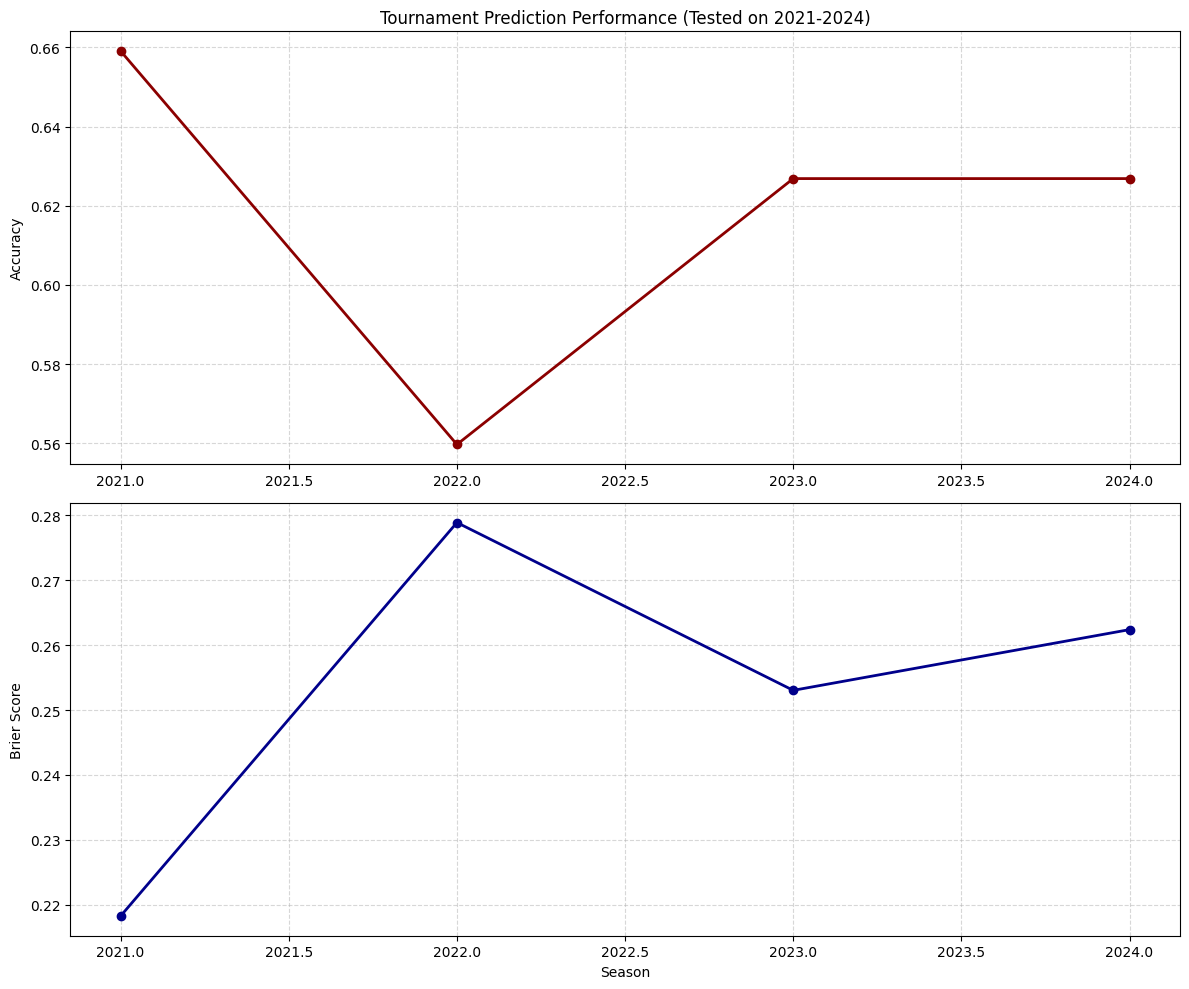


=== Final Results ===
 Test Season  Accuracy  Brier Score
        2021  0.659091     0.218243
        2022  0.559701     0.278894
        2023  0.626866     0.253032
        2024  0.626866     0.262393

Average Accuracy: 0.6181
Average Brier Score: 0.2531
Best Brier Score: 0.2182 in 2021


In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, brier_score_loss
import matplotlib.pyplot as plt

# Load the tournament data
tourney_df = pd.read_csv('class_data/tourney_final.csv')

# Features to use
features = ['diff_PPG', 'diff_OPPG', 'diff_FG%', 'diff_FGA/G', 'diff_3P%', 'diff_FGA3/G', 
            'diff_FT%', 'diff_RPG', 'diff_TPG', 'diff_SPG', 'diff_BPG', 'diff_Pace', 
            'diff_POM_Rank']

# Initialize storage
feature_importance_history = {feature: [] for feature in features}
accuracies = []
brier_scores = []
test_seasons = []

# Define training and testing periods
train_years = range(2008, 2020)  # 2008-2019
test_years = [2021, 2022, 2023, 2024]  # Skip 2020 (COVID year)

# Train on all tournament games from 2008-2019
train_data = tourney_df[tourney_df['Season'].isin(train_years)]
X_train = train_data[features]
y_train = train_data['target']

# Train the model
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# Test on each tournament year separately
for season in test_years:
    test_data = tourney_df[tourney_df['Season'] == season]
    
    if len(test_data) == 0:
        print(f"Skipping {season} - no tournament data available")
        continue
    
    X_test = test_data[features]
    y_test = test_data['target']
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    brier_score = brier_score_loss(y_test, y_proba)
    
    # Store results
    accuracies.append(accuracy)
    brier_scores.append(brier_score)
    test_seasons.append(season)
    
    # Get feature importances
    importance = model.feature_importances_
    for feature, imp in zip(features, importance):
        feature_importance_history[feature].append(imp)
    
    print(f"Season {season}: Accuracy = {accuracy:.4f}, Brier Score = {brier_score:.4f}")

# Feature Importance Plot
plt.figure(figsize=(14, 8))
for feature in features:
    plt.barh(feature, np.mean(feature_importance_history[feature]))
plt.xlabel('Average Feature Importance')
plt.title('Feature Importance (Trained on 2008-2019 Tournament Data)')
plt.tight_layout()
plt.show()

# Results visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Accuracy plot
ax1.plot(test_seasons, accuracies, marker='o', color='darkred', linewidth=2)
ax1.set_ylabel('Accuracy')
ax1.set_title('Tournament Prediction Performance (Tested on 2021-2024)')
ax1.grid(True, linestyle='--', alpha=0.5)

# Brier score plot
ax2.plot(test_seasons, brier_scores, marker='o', color='darkblue', linewidth=2)
ax2.set_xlabel('Season')
ax2.set_ylabel('Brier Score')
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Final summary
print("\n=== Final Results ===")
results_df = pd.DataFrame({
    'Test Season': test_seasons,
    'Accuracy': accuracies,
    'Brier Score': brier_scores
})
print(results_df.to_string(index=False))

print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Brier Score: {np.mean(brier_scores):.4f}")
print(f"Best Brier Score: {min(brier_scores):.4f} in {test_seasons[np.argmin(brier_scores)]}")

Script to create all matchup possibilites and assign the team stats from 2010 - 2025. This will help for visualization

In [ ]:

teams_df = pd.read_csv('../data/MTeams.csv')  # Update with the actual path
team_stats_df = pd.read_csv('class_data/team_season_stats.csv')

# Define the features to calculate differences
features = [
    'diff_PPG', 'diff_OPPG', 'diff_FG%', 'diff_FGA/G', 'diff_3P%', 'diff_FGA3/G', 
    'diff_FT%', 'diff_RPG', 'diff_TPG', 'diff_SPG', 'diff_BPG', 'diff_Pace', 'diff_POM_Rank'
]

for year in range(2010, 2026):
    print(f"\nProcessing year {year}...")
    
    # Filter teams that were in D1 for this year
    current_teams = teams_df[teams_df['FirstD1Season'] <= year]
    current_teams = current_teams[current_teams['LastD1Season'] >= year]
    
    # Filter team stats for this year
    team_stats_year = team_stats_df[team_stats_df['Season'] == year]
    
    matchups = []
    available_teams = team_stats_year['TeamID'].unique()
    
    # Iterate through all possible matchups
    for i, team_a in current_teams.iterrows():
        for j, team_b in current_teams.iterrows():
            if team_a['TeamID'] < team_b['TeamID']:  # Ensure unique matchups
                team_a_id = team_a['TeamID']
                team_b_id = team_b['TeamID']
                
                # Only proceed if both teams have stats
                if team_a_id in available_teams and team_b_id in available_teams:
                    team_a_stats = team_stats_year[team_stats_year['TeamID'] == team_a_id]
                    team_b_stats = team_stats_year[team_stats_year['TeamID'] == team_b_id]
                    
                    # Calculate the differences in features
                    matchup_data = {
                        'Season': year,
                        'TeamID': team_a_id,
                        'OpponentID': team_b_id
                    }
                    
                    for feature in features:
                        base_feature = feature.replace('diff_', '')
                        matchup_data[feature] = team_a_stats[base_feature].values[0] - team_b_stats[base_feature].values[0]
                    
                    matchups.append(matchup_data)
    
    # Create DataFrame and clean up
    if matchups:
        matchups_df = pd.DataFrame(matchups)
        matchups_df[features] = matchups_df[features].round(3)
        
        # Reorder columns
        columns = ['Season', 'TeamID', 'OpponentID'] + features
        matchups_df = matchups_df[columns]
        
        # Save to file
        output_path = f'all_matchups/matchups_{year}.csv'
        matchups_df.to_csv(output_path, index=False)
        print(f"Saved {len(matchups_df)} matchups to {output_path}")
    else:
        print(f"No valid matchups found for {year}")

print("\nAll matchup files created successfully!")


Processing year 2010...
Saved 60031 matchups to all_matchups/matchups_2010.csv

Processing year 2011...
Saved 59340 matchups to all_matchups/matchups_2011.csv

Processing year 2012...
Saved 59340 matchups to all_matchups/matchups_2012.csv

Processing year 2013...
Saved 60031 matchups to all_matchups/matchups_2013.csv

Processing year 2014...
Saved 61425 matchups to all_matchups/matchups_2014.csv

Processing year 2015...
Saved 61425 matchups to all_matchups/matchups_2015.csv

Processing year 2016...
Saved 61425 matchups to all_matchups/matchups_2016.csv

Processing year 2017...
Saved 61425 matchups to all_matchups/matchups_2017.csv

Processing year 2018...
Saved 61425 matchups to all_matchups/matchups_2018.csv

Processing year 2019...
Saved 62128 matchups to all_matchups/matchups_2019.csv

Processing year 2020...
Saved 62128 matchups to all_matchups/matchups_2020.csv

Processing year 2021...
Saved 60031 matchups to all_matchups/matchups_2021.csv

Processing year 2022...
Saved 63903 mat

Predict probabilities for every possible matchup since 2010

In [ ]:
# Define the features used in the model
features = [
    'diff_PPG', 'diff_OPPG', 'diff_FG%', 'diff_FGA/G', 'diff_3P%', 'diff_FGA3/G', 
    'diff_FT%', 'diff_RPG', 'diff_TPG', 'diff_SPG', 'diff_BPG', 'diff_Pace', 'diff_POM_Rank'
]


for year in range(2008, 2026):
    # Check if we have a model for this year
    if year not in models:
        print(f"No model available for {year}")
        continue
    
    model = models[year]
    
    # Load the matchup data
    matchup_file = f'all_matchups/matchups_{year}.csv'
    if not os.path.exists(matchup_file):
        print(f"Matchup file not found for {year}")
        continue
    
    try:
        matchups_df = pd.read_csv(matchup_file)
        
        # Validate required columns exist
        if not all(col in matchups_df.columns for col in features):
            print(f"Missing required columns in {matchup_file}")
            continue
            
        # Prepare features and predict probs
        X_matchups = matchups_df[features]
        y_prob = model.predict_proba(X_matchups)[:, 1]
        matchups_df['Pred'] = y_prob
        
        # Create id column
        matchups_df['ID'] = matchups_df.apply(
            lambda row: f"{year}_{int(row['TeamID'])}_{int(row['OpponentID'])}", 
            axis=1
        )
        
        # Create output DataFrame
        output_df = matchups_df[['ID', 'Pred']]
        
        # Save predictions
        output_file = f'preds/preds_{year}.csv'
        output_df.to_csv(output_file, index=False)
        print(f"Successfully saved predictions for {year} to {output_file}")
        
    except Exception as e:
        print(f"Error processing {year}: {str(e)}")
        continue

print("\nPrediction generation complete!")

Matchup file not found for 2008
Matchup file not found for 2009
Successfully saved predictions for 2010 to preds/preds_2010.csv
Successfully saved predictions for 2011 to preds/preds_2011.csv
Successfully saved predictions for 2012 to preds/preds_2012.csv
Successfully saved predictions for 2013 to preds/preds_2013.csv
Successfully saved predictions for 2014 to preds/preds_2014.csv
Successfully saved predictions for 2015 to preds/preds_2015.csv
Successfully saved predictions for 2016 to preds/preds_2016.csv
Successfully saved predictions for 2017 to preds/preds_2017.csv
Successfully saved predictions for 2018 to preds/preds_2018.csv
Successfully saved predictions for 2019 to preds/preds_2019.csv
Successfully saved predictions for 2020 to preds/preds_2020.csv
Successfully saved predictions for 2021 to preds/preds_2021.csv
Successfully saved predictions for 2022 to preds/preds_2022.csv
Successfully saved predictions for 2023 to preds/preds_2023.csv
Successfully saved predictions for 2024 